In [6]:
import numba
import sys
sys.path.insert(0, './python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers

In [2]:
%matplotlib inline

In [3]:
Degree = 4 # degree
Height = 2 # Height of the tree

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


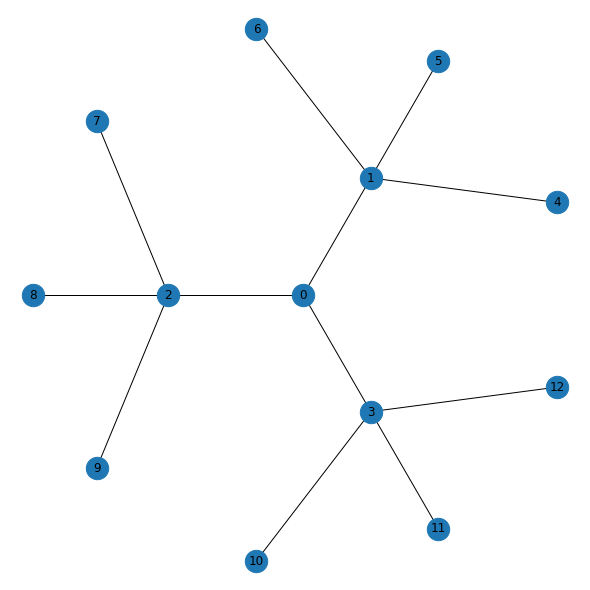

[[6, 11], [0, 3], [10, 4], [5, 1]]


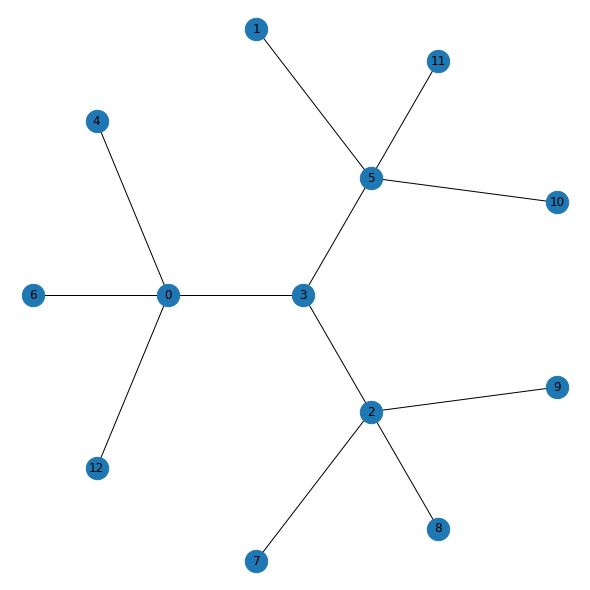

In [4]:
import imp 

import graph_gen
imp.reload(graph_gen)
N, J_interaction = graph_gen.tree_interaction(Degree,Height)

#H = np.random.random(N)
H = np.zeros(N)

num_swap = 4
swaps = []
nodes = list(range(N))
for n in range(num_swap):
    ss_temp = random.sample(nodes, 2)
    swaps.append(ss_temp)
    #print(ss_temp)
    nodes.remove(ss_temp[0])
    nodes.remove(ss_temp[1])
    
print(swaps)

J_interaction_rand = J_interaction.copy()
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    J_interaction_rand[w] = J_interaction_rand[rev] 
    J_interaction_rand[:,w] = J_interaction_rand[:,rev] 
    H_rand[w] = H_rand[rev]
J_interaction_rand
graph_gen.plot_matrix_graph(J_interaction_rand)

betas = np.arange(1e-6,2,1e-2)
betas_fast = np.arange(1e-6,2,1e-1)

j_start = 1
j = graph_gen.fixed_value(j_start)
J = graph_gen.set_J(J_interaction, j)
J_rand = graph_gen.set_J(J_interaction_rand, j)

#N_rand, J_interaction_rand = graph_gen.tree_interaction(Degree, Height, rand=True)

In [5]:
tree = model.model(N, H, J, J_interaction)
tree_rand = model.model(N, H_rand, J_rand, J_interaction_rand)
res_ex = solvers.exact_sol(tree, betas_fast)

beta: 0.0, Fe: -693147.181 Energy: -9.23e-07 M: 6e-19 S: 0.693
beta: 0.1, Fe: -6.977 Energy: -0.092 M: -1.19e-18 S: 0.689
beta: 0.2, Fe: -3.557 Energy: -0.182 M: 2.94e-18 S: 0.675
beta: 0.3, Fe: -2.447 Energy: -0.269 M: 1.13e-17 S: 0.653
beta: 0.4, Fe: -1.913 Energy: -0.351 M: -1.34e-17 S: 0.625
beta: 0.5, Fe: -1.608 Energy: -0.427 M: 0.0 S: 0.5912
beta: 0.6, Fe: -1.417 Energy: -0.496 M: -1.77e-17 S: 0.553
beta: 0.7, Fe: -1.290 Energy: -0.558 M: -2.23e-17 S: 0.512
beta: 0.8, Fe: -1.202 Energy: -0.613 M: -1.67e-17 S: 0.471
beta: 0.9, Fe: -1.139 Energy: -0.661 M: -2.91e-17 S: 0.43
beta: 1.0, Fe: -1.094 Energy: -0.703 M: 2.4e-17 S: 0.391
beta: 1.1, Fe: -1.060 Energy: -0.739 M: 5.64e-17 S: 0.353
beta: 1.2, Fe: -1.034 Energy: -0.77 M: -2.82e-17 S: 0.318
beta: 1.3, Fe: -1.015 Energy: -0.795 M: 4.07e-17 S: 0.285
beta: 1.4, Fe: -1.000 Energy: -0.817 M: 2.85e-17 S: 0.256
beta: 1.5, Fe: -0.989 Energy: -0.836 M: 0.0 S: 0.23.5
beta: 1.6, Fe: -0.979 Energy: -0.851 M: 0.0 S: 0.2064
beta: 1.7, Fe: -0

In [7]:
res_nn = solvers.nn_sol(tree, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -693147.210 std_fe: 3.53E-02 M: -0.001 S: 0.693 E: -0.001-0.00631225
fe: -6.977 std_fe: 8.13E-05 M: -0.002 S: 0.689 E: -0.0890.0056953
fe: -3.557 std_fe: 8.43E-05 M: 0.006 S: 0.674 E: -0.186 0.0038580
fe: -2.447 std_fe: 8.80E-05 M: -0.002 S: 0.654 E: -0.2660.024554
fe: -1.913 std_fe: 6.60E-05 M: -0.002 S: 0.625 E: -0.349-0.01719
fe: -1.608 std_fe: 7.16E-05 M: -0.004 S: 0.589 E: -0.431-0.01327
fe: -1.417 std_fe: 8.41E-05 M: 0.002 S: 0.555 E: -0.493 0.024815
fe: -1.290 std_fe: 7.35E-05 M: 0.005 S: 0.510 E: -0.5610.0040353
fe: -1.202 std_fe: 8.19E-05 M: 0.003 S: 0.472 E: -0.612-0.026562
fe: -1.139 std_fe: 6.29E-05 M: 0.010 S: 0.431 E: -0.661-0.001084
fe: -1.094 std_fe: 7.74E-05 M: -0.002 S: 0.391 E: -0.702.0044653
fe: -1.060 std_fe: 6.87E-05 M: -0.006 S: 0.350 E: -0.7410.017878
fe: -1.034 std_fe: 7.98E-05 M: -0.004 S: 0.318 E: -0.770.0049229
fe: -1.015 std_fe: 7.46E-05 M: 0.005 S: 0.286 E: -0.7950.0154085
fe: -1.000 std_fe: 8.27E-05 M: -0.000 S: 0.256 E: -0.817.0023115
fe: -0.989 std_

In [10]:
res_nn_z2 = solvers.nn_sol(tree, betas_fast, max_step=2000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -693147.238 std_fe: 1.28E+01 M: 0.002 S: 0.693 E: 0.004 M: 0.009388388
fe: -6.977 std_fe: 1.07E-04 M: 0.002 S: 0.688 E: -0.093: -0.010848
fe: -3.557 std_fe: 1.06E-04 M: 0.001 S: 0.675 E: -0.180: -0.008928
fe: -2.447 std_fe: 1.06E-04 M: 0.003 S: 0.653 E: -0.271: 0.0007698
fe: -1.913 std_fe: 1.04E-04 M: 0.009 S: 0.625 E: -0.351 0.0063155
fe: -1.608 std_fe: 1.13E-04 M: -0.002 S: 0.591 E: -0.427-0.023215
fe: -1.417 std_fe: 1.00E-04 M: 0.005 S: 0.551 E: -0.499 0.0050815
fe: -1.290 std_fe: 1.06E-04 M: -0.008 S: 0.511 E: -0.560-0.028344
fe: -1.202 std_fe: 1.02E-04 M: -0.007 S: 0.472 E: -0.612-0.016671
fe: -1.139 std_fe: 1.16E-04 M: -0.019 S: 0.432 E: -0.659-0.002158
fe: -1.094 std_fe: 1.23E-04 M: -0.002 S: 0.391 E: -0.7030.0325315
fe: -1.060 std_fe: 1.28E-04 M: 0.003 S: 0.351 E: -0.741 0.0195923
fe: -1.034 std_fe: 1.45E-04 M: -0.003 S: 0.315 E: -0.772-0.012328
fe: -1.015 std_fe: 1.47E-04 M: 0.009 S: 0.286 E: -0.795 0.0583153
fe: -1.000 std_fe: 1.64E-04 M: -0.009 S: 0.253 E: -0.819-0.01185

In [11]:
res_nn_rand = solvers.nn_sol(tree_rand, betas_fast, max_step=2000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_rand["name"]="nn_rand"


fe: -693147.179 std_fe: 6.38E-02 M: 0.002 S: 0.693 E: -0.001: -0.0103798
fe: -6.977 std_fe: 1.11E-02 M: -0.001 S: 0.689 E: -0.090 0.0041080
fe: -3.557 std_fe: 2.15E-02 M: 0.002 S: 0.675 E: -0.182: -0.006462
fe: -2.445 std_fe: 3.10E-02 M: 0.004 S: 0.655 E: -0.262: -0.002083
fe: -1.908 std_fe: 3.96E-02 M: 0.003 S: 0.630 E: -0.333: 0.0126354
fe: -1.601 std_fe: 4.72E-02 M: -0.006 S: 0.599 E: -0.402 -0.018693
fe: -1.406 std_fe: 5.36E-02 M: -0.006 S: 0.567 E: -0.461 -0.008319
fe: -1.274 std_fe: 5.92E-02 M: 0.006 S: 0.536 E: -0.508: -0.014983
fe: -1.182 std_fe: 6.42E-02 M: 0.005 S: 0.505 E: -0.551: 0.0331778
fe: -1.113 std_fe: 6.85E-02 M: 0.002 S: 0.471 E: -0.590: 0.0243690
fe: -1.062 std_fe: 7.22E-02 M: 0.030 S: 0.445 E: -0.617: 0.0288769
fe: -1.024 std_fe: 5.80E-02 M: 0.393 S: 0.385 E: -0.674: 0.393
fe: -0.997 std_fe: 4.08E-02 M: 0.581 S: 0.322 E: -0.728: 0.592
fe: -0.978 std_fe: 3.12E-02 M: 0.683 S: 0.273 E: -0.768: 0.669
fe: -0.965 std_fe: 2.23E-02 M: 0.765 S: 0.230 E: -0.801: 0.774
fe: -

In [12]:
res_nn_z2_rand = solvers.nn_sol(tree_rand, betas_fast, max_step=500,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2_rand["name"]="nn_z2_rand"

fe: -693147.400 std_fe: 9.71E+01 M: -0.003 S: 0.693 E: -0.0000.007695402
fe: -6.977 std_fe: 8.89E-03 M: -0.003 S: 0.689 E: -0.090-0.011189
fe: -3.557 std_fe: 1.42E-02 M: -0.005 S: 0.675 E: -0.1800.0135983
fe: -2.447 std_fe: 3.72E-03 M: -0.001 S: 0.654 E: -0.2670.0047762
fe: -1.913 std_fe: 1.47E-03 M: 0.001 S: 0.623 E: -0.354 -0.008624
fe: -1.608 std_fe: 6.51E-04 M: -0.010 S: 0.591 E: -0.4260.0105919
fe: -1.417 std_fe: 3.15E-04 M: -0.011 S: 0.551 E: -0.4980.0003089
fe: -1.290 std_fe: 1.74E-04 M: 0.001 S: 0.514 E: -0.556 -0.018308
fe: -1.202 std_fe: 1.22E-04 M: -0.006 S: 0.469 E: -0.6160.0106383
fe: -1.139 std_fe: 1.08E-04 M: -0.005 S: 0.431 E: -0.661-0.019408
fe: -1.094 std_fe: 1.09E-04 M: -0.009 S: 0.391 E: -0.702-0.03894
fe: -1.060 std_fe: 1.12E-04 M: -0.007 S: 0.355 E: -0.7370.018957
fe: -1.034 std_fe: 1.19E-04 M: 0.001 S: 0.317 E: -0.7700.0277462
fe: -1.015 std_fe: 1.03E-04 M: -0.002 S: 0.288 E: -0.7930.005856
fe: -1.000 std_fe: 1.01E-04 M: 0.016 S: 0.256 E: -0.817 0.031523
fe: -0.9

In [13]:
res_bp = solvers.bp_sol(tree, betas_fast)
res_bp["name"]="bp"

fe: -693147.181, ener: -0.000, M: 0.000, iter 3
fe: -6.977, ener: -0.092, M: 0.000, iter 4
fe: -3.557, ener: -0.182, M: 0.000, iter 4
fe: -2.447, ener: -0.269, M: 0.000, iter 4
fe: -1.913, ener: -0.351, M: 0.000, iter 4
fe: -1.608, ener: -0.427, M: 0.000, iter 4
fe: -1.417, ener: -0.496, M: 0.000, iter 4
fe: -1.290, ener: -0.558, M: 0.000, iter 4
fe: -1.202, ener: -0.613, M: 0.000, iter 4
fe: -1.139, ener: -0.661, M: 0.000, iter 4
fe: -1.094, ener: -0.703, M: 0.000, iter 4
fe: -1.060, ener: -0.739, M: 0.000, iter 4
fe: -1.034, ener: -0.770, M: 0.000, iter 4
fe: -1.015, ener: -0.795, M: 0.000, iter 4
fe: -1.000, ener: -0.817, M: 0.000, iter 4
fe: -0.989, ener: -0.836, M: 0.000, iter 4
fe: -0.979, ener: -0.851, M: 0.000, iter 4
fe: -0.972, ener: -0.863, M: 0.000, iter 4
fe: -0.967, ener: -0.874, M: 0.000, iter 4
fe: -0.962, ener: -0.883, M: 0.000, iter 4


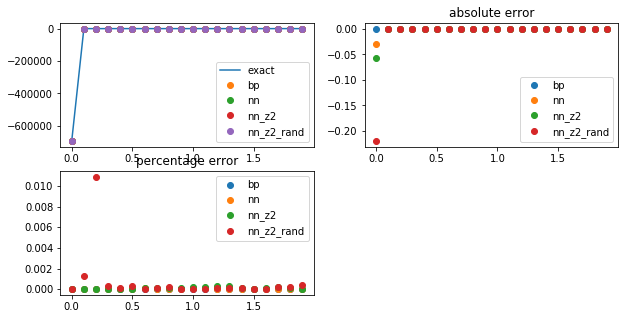

In [17]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2, res_nn_z2_rand])
#plt.ylim(-0.0001,0.00021)
plt.show()

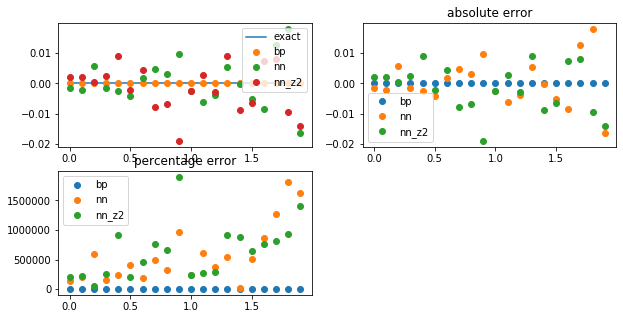

In [15]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

./python_lib/solvers.py:191: RuntimeWarning: invalid value encountered in true_divide
  ax2.plot(other["betas"][init_:], 100*abs(other[label][init_:] - res_ex[label][init_:]).sum(axis=1)/len(other[label]) / res_ex[label][init_:].sum(axis=1), "o",
./python_lib/solvers.py:191: RuntimeWarning: divide by zero encountered in true_divide
  ax2.plot(other["betas"][init_:], 100*abs(other[label][init_:] - res_ex[label][init_:]).sum(axis=1)/len(other[label]) / res_ex[label][init_:].sum(axis=1), "o",


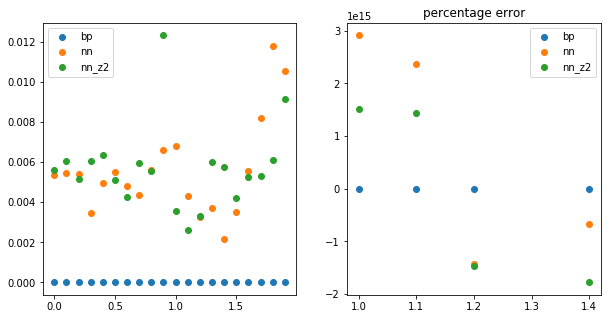

In [16]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_z2])
plt.show()

# With random field

In [58]:
H = np.random.random(N)
H_rand = H.copy()

for w in swaps:
    rev = list(reversed(w))
    H_rand[w] = H_rand[rev]


In [59]:
tree_2 = model.model(N, H, J, J_interaction)
tree_rand_2 = model.model(N, H_rand, J_rand, J_interaction_rand)

res_ex_2 = solvers.exact_sol(tree_2, betas_fast)

res_nn_2 = solvers.nn_sol(tree_2, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_2["name"]="nn"
res_nn_rand_2 = solvers.nn_sol(tree_rand_2, betas_fast, max_step=500, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn_rand_2["name"]="nn_rand"

res_bp_2 = solvers.bp_sol(tree_2, betas_fast)
res_bp_2["name"]="bp"

beta: 0.0, Fe: -693147.181 Energy: -1.11e-06 M: 3.52e-07 S: 0.693
beta: 0.1, Fe: -6.988 Energy: -0.115 M: 0.0431 S: 0.6875
beta: 0.2, Fe: -3.583 Energy: -0.243 M: 0.108 S: 0.66818
beta: 0.3, Fe: -2.493 Energy: -0.385 M: 0.2 S: 0.6331.86
beta: 0.4, Fe: -1.985 Energy: -0.537 M: 0.317 S: 0.57907
beta: 0.5, Fe: -1.711 Energy: -0.689 M: 0.448 S: 0.51128
beta: 0.6, Fe: -1.552 Energy: -0.825 M: 0.572 S: 0.43693
beta: 0.7, Fe: -1.456 Energy: -0.934 M: 0.675 S: 0.36547
beta: 0.8, Fe: -1.397 Energy: -1.02 M: 0.756 S: 0.303.45
beta: 0.9, Fe: -1.358 Energy: -1.08 M: 0.816 S: 0.255.77
beta: 1.0, Fe: -1.333 Energy: -1.13 M: 0.86 S: 0.2065.21
beta: 1.1, Fe: -1.316 Energy: -1.16 M: 0.893 S: 0.174.96
beta: 1.2, Fe: -1.304 Energy: -1.19 M: 0.918 S: 0.144.63
beta: 1.3, Fe: -1.296 Energy: -1.21 M: 0.937 S: 0.115.40
beta: 1.4, Fe: -1.290 Energy: -1.22 M: 0.951 S: 0.094838
beta: 1.5, Fe: -1.286 Energy: -1.23 M: 0.962 S: 0.078.26
beta: 1.6, Fe: -1.283 Energy: -1.24 M: 0.971 S: 0.064215
beta: 1.7, Fe: -1.281 

KeyboardInterrupt: 

In [ ]:
%matplotlib inline
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_rand])
#plt.ylim(-0.001,0.011)
plt.show()

In [ ]:
%matplotlib inline
imp.reload(solvers)
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_rand])
plt.show()

In [ ]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_rand])
plt.show()

In [ ]:
import matplotlib.pyplot as plt

H_inv = res_nn_rand["M_i"][5].copy()
for w in swaps:
    rev = list(reversed(w))
    H_inv[w] = H_inv[rev]

plt.plot(res_ex["M_i"][5], res_nn["M_i"][5], "o", label="nn")
plt.plot(res_ex["M_i"][5], H_inv,"o", label="nn_rand")
plt.legend()
plt.show()